In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [7]:
pd.set_option("display.max_columns", None)


In [2]:
df_1=pd.read_csv("https://raw.githubusercontent.com/JovianML/opendatasets/master/data/stackoverflow-developer-survey-2020/survey_results_public.csv")

In [394]:
df_1.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
df_1.shape

(64461, 61)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [14]:
selected_columns=[#DEMOGRAPHICS
    'Country',
'Ethnicity',
'Age',
'Gender',
'EdLevel',
'UndergradMajor',
##EMPLOYMENT
'Employment',
'DevType',
'JobFactors',
'JobSat',                        
'JobSeek',
'WorkWeekHrs',
'CompFreq',                      
 ##PRG EXPERIENCES
'Age1stCode',
'LanguageWorkedWith',
'LanguageDesireNextYear',
'WebframeDesireNextYear',
'NEWStuck',
'YearsCode',
'WebframeWorkedWith',
'YearsCodePro',
'Hobbyist']

In [15]:
df_developers=df_1[selected_columns].copy()
df_developers.head(5)

,Country,Ethnicity,Age,Gender,EdLevel,UndergradMajor,Employment,DevType,JobFactors,JobSat,JobSeek,WorkWeekHrs,CompFreq,Age1stCode,LanguageWorkedWith,LanguageDesireNextYear,WebframeDesireNextYear,NEWStuck,YearsCode,WebframeWorkedWith,YearsCodePro,Hobbyist
0,Germany,White or of European descent,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...","Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,50.0,Monthly,13,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,ASP.NET Core,Visit Stack Overflow;Go for a walk or other ph...,36,ASP.NET;ASP.NET Core,27,Yes
1,United Kingdom,NaN,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,I am not interested in new job opportunities,NaN,NaN,19,JavaScript;Swift,Python;Swift,NaN,Visit Stack Overflow;Go for a walk or other ph...,7,NaN,4,No
2,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,4,NaN,NaN,Yes
3,Albania,White or of European descent,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,NaN,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",40.0,NaN,18,NaN,NaN,NaN,NaN,7,NaN,4,Yes
4,United States,White or of European descent,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,16,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Django;Ruby on Rails,Call a coworker or friend;Visit Stack Overflow...,15,Ruby on Rails,8,Yes


In [16]:
df_developers.isnull().sum()/len(df_developers) *100

Country                    0.603466
Ethnicity                 28.719691
Age                       29.498456
Gender                    21.569631
EdLevel                   10.905819
UndergradMajor            20.890151
Employment                 0.941655
DevType                   23.411055
JobFactors                23.443633
JobSat                    29.889390
JobSeek                   19.754580
WorkWeekHrs               36.161400
CompFreq                  37.839934
Age1stCode                10.178247
LanguageWorkedWith        10.988039
LanguageDesireNextYear    16.053117
WebframeDesireNextYear    37.909744
NEWStuck                  14.703464
YearsCode                 10.513334
WebframeWorkedWith        34.411505
YearsCodePro              28.097609
Hobbyist                   0.069810
dtype: float64

In [17]:
df_developers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 22 columns):
Country                   64072 non-null object
Ethnicity                 45948 non-null object
Age                       45446 non-null float64
Gender                    50557 non-null object
EdLevel                   57431 non-null object
UndergradMajor            50995 non-null object
Employment                63854 non-null object
DevType                   49370 non-null object
JobFactors                49349 non-null object
JobSat                    45194 non-null object
JobSeek                   51727 non-null object
WorkWeekHrs               41151 non-null float64
CompFreq                  40069 non-null object
Age1stCode                57900 non-null object
LanguageWorkedWith        57378 non-null object
LanguageDesireNextYear    54113 non-null object
WebframeDesireNextYear    40024 non-null object
NEWStuck                  54983 non-null object
YearsCode                

In [19]:
##These 3 columns are in object data type, so we will convert it into numeric datatype
df_developers['Age1stCode']=pd.to_numeric(df_developers['Age1stCode'],errors='coerce')
df_developers['YearsCode']=pd.to_numeric(df_developers['YearsCode'],errors='coerce')
df_developers['YearsCodePro']=pd.to_numeric(df_developers['YearsCodePro'],errors='coerce')


In [20]:
df_developers.describe()

,Age,WorkWeekHrs,Age1stCode,YearsCode,YearsCodePro
count,45446.000000,41151.000000,57473.000000,56784.000000,44133.000000
mean,30.834111,40.782174,15.476572,12.782051,8.869667
std,9.585392,17.816383,5.114081,9.490657,7.759961
min,1.000000,1.000000,5.000000,1.000000,1.000000
25%,24.000000,40.000000,12.000000,6.000000,3.000000
50%,29.000000,40.000000,15.000000,10.000000,6.000000
75%,35.000000,44.000000,18.000000,17.000000,12.000000
max,279.000000,475.000000,85.000000,50.000000,50.000000


In [24]:
## The maximum age is 279 which is not possible ,the minimum age is 1 which is again impossible, 
##also the max workweekhrs is 475 which is again not possible as a week contains 168 hours.
df_developers.drop(df_developers[df_developers['Age']>100].index,inplace=True)
df_developers.drop(df_developers[df_developers['Age']<10].index,inplace=True)
df_developers.drop(df_developers[df_developers['WorkWeekHrs']>140].index,inplace=True)



In [29]:
df_developers.where(~(df_developers['Gender'].str.contains(';',na=False)),np.NaN,inplace=True)


In [31]:
df_developers.head(100)

,Country,Ethnicity,Age,Gender,EdLevel,UndergradMajor,Employment,DevType,JobFactors,JobSat,JobSeek,WorkWeekHrs,CompFreq,Age1stCode,LanguageWorkedWith,LanguageDesireNextYear,WebframeDesireNextYear,NEWStuck,YearsCode,WebframeWorkedWith,YearsCodePro,Hobbyist
0,Germany,White or of European descent,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...","Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,50.0,Monthly,13.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,ASP.NET Core,Visit Stack Overflow;Go for a walk or other ph...,36.0,ASP.NET;ASP.NET Core,27.0,Yes
1,United Kingdom,NaN,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,I am not interested in new job opportunities,NaN,NaN,19.0,JavaScript;Swift,Python;Swift,NaN,Visit Stack Overflow;Go for a walk or other ph...,7.0,NaN,4.0,No
2,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,4.0,NaN,NaN,Yes
3,Albania,White or of European descent,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,NaN,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",40.0,NaN,18.0,NaN,NaN,NaN,NaN,7.0,NaN,4.0,Yes
4,United States,White or of European descent,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,16.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Django;Ruby on Rails,Call a coworker or friend;Visit Stack Overflow...,15.0,Ruby on Rails,8.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Canada,White or of European descent,30.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Employed full-time,"Developer, back-end",Diversity of the company or organization;Langu...,Slightly dissatisfied,I am actively looking for a job,35.0,Yearly,13.0,Bash/Shell/PowerShell;Go;Java;JavaScript;Rust;...,Bash/Shell/PowerShell;Go;Java;Rust,NaN,Call a coworker or friend;Go for a walk or oth...,17.0,NaN,4.0,Yes
96,Czech Republic,White or of European descent,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Employed full-time,"Developer, desktop or enterprise applications;...","Flex time or a flexible schedule;Languages, fr...",Slightly satisfied,I am not interested in new job opportunities,40.0,Monthly,15.0,C++;Python,C++;Python,NaN,Call a coworker or friend,10.0,NaN,5.0,No
97,Canada,NaN,30.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Employed full-time,"Developer, back-end;Developer, front-end;Devel...","Industry that I’d be working in;Languages, fra...",Very dissatisfied,I am actively looking for a job,40.0,Yearly,7.0,Go;JavaScript;Python;SQL;TypeScript,Python;TypeScript,NaN,Play games;Call a coworker or friend;Visit Sta...,15.0,React.js,9.0,Yes
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
for i in df_developers.columns:
    print(i, df_developers[i].nunique())
    

Country 183
Ethnicity 197
Age 105
Gender 3
EdLevel 9
UndergradMajor 12
Employment 7
DevType 8213
JobFactors 230
JobSat 5
JobSeek 3
WorkWeekHrs 144
CompFreq 3
Age1stCode 61
LanguageWorkedWith 14169
LanguageDesireNextYear 16123
WebframeDesireNextYear 3957
NEWStuck 444
YearsCode 50
WebframeWorkedWith 3766
YearsCodePro 50
Hobbyist 2


DEMOGRAPHICS

In [43]:
top_countries =df_developers['Country'].value_counts().head(15)

In [49]:
top_countries.index

Index(['United States', 'India', 'United Kingdom', 'Germany', 'Canada',
       'France', 'Brazil', 'Netherlands', 'Poland', 'Australia', 'Spain',
       'Italy', 'Russian Federation', 'Sweden', 'Pakistan'],
      dtype='object')

In [137]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

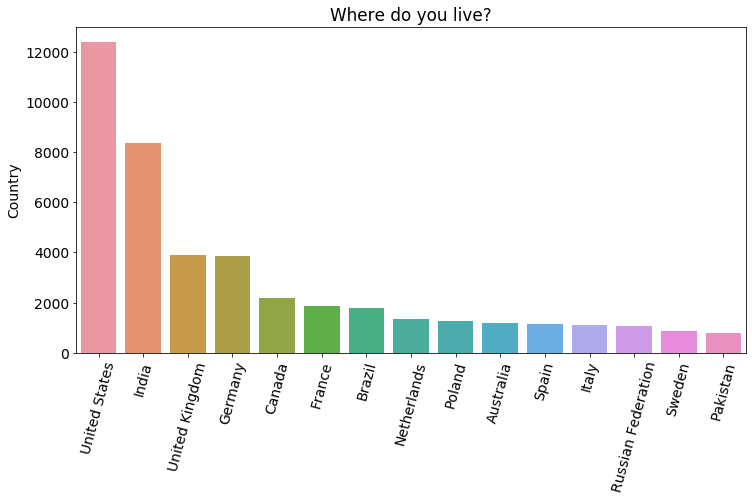

In [138]:
plt.figure(figsize=(12,6))
sns.barplot(top_countries.index,top_countries)
plt.xticks(rotation=75)
plt.title('Where do you live?');

It can be seen that higher number of respondent are from US followed by India.

In [78]:
df_developers.loc[df_developers.Age==99].shape

(7, 22)

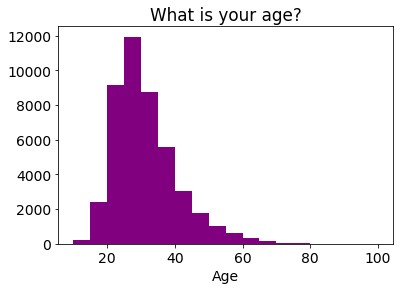

In [139]:
plt.hist('Age',data=df_developers,bins=np.arange(10,105,5),color='purple')
plt.title('What is your age?')
plt.xlabel('Age');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

In [141]:
df_developers['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

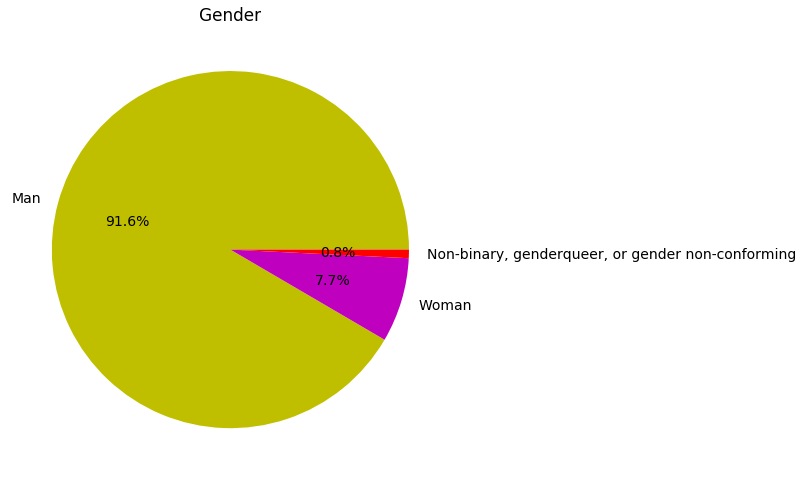

In [142]:
plt.figure(figsize=(8,9))
matplotlib.rcParams['font.size'] = 14
plt.title('Gender')
plt.pie(df_developers['Gender'].value_counts(),labels=df_developers['Gender'].value_counts().index,autopct='%1.1f%%',colors='ymr');

Only around 8% of the respondent are women and Non-binary,genderqueer or gender non-conforming.

In [143]:
df_developers['EdLevel'].value_counts().index

Index(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'],
      dtype='object')

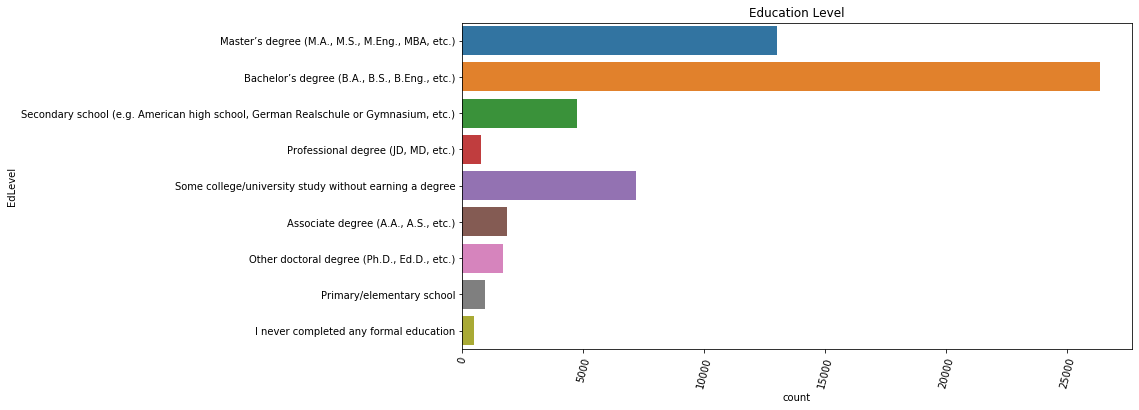

In [144]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.countplot(y=df_developers['EdLevel'])
plt.xticks(rotation=75)
plt.title('Education Level');

It appears most of the respondent have completed Bachelor's degree .But from the given data ,we cannot identify which stream they have studied.

In [133]:
df_developers['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

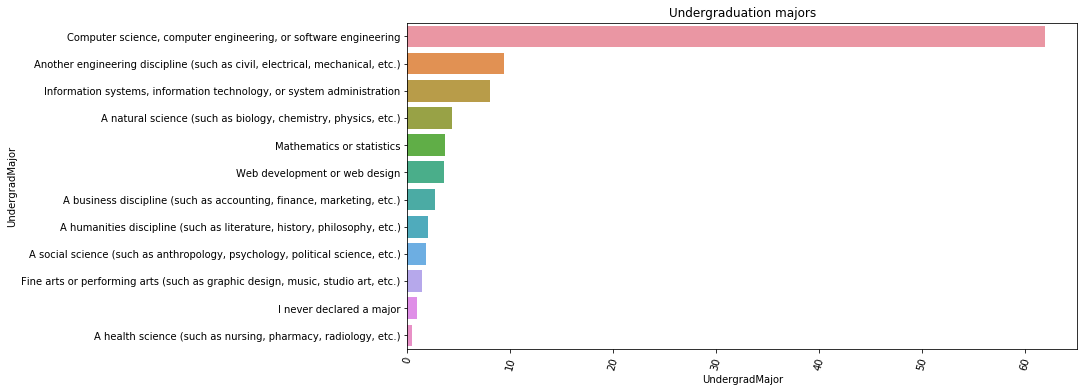

In [164]:
plt.figure(figsize=(12,6))
undergrad_pct =100* df_developers['UndergradMajor'].value_counts()/df_developers['UndergradMajor'].count()
sns.barplot(y=undergrad_pct.index,x=undergrad_pct)
plt.xticks(rotation=75)
plt.ylabel('UndergradMajor')
plt.xlabel('Percentage')
plt.title('Undergraduation majors');

60% of the respondents are Computer Science or related fields graduate but its quite good to see that 40% are from other backgrounds
which means it is not necessary to study computer science to be a programmer.

EMPLOYMENT

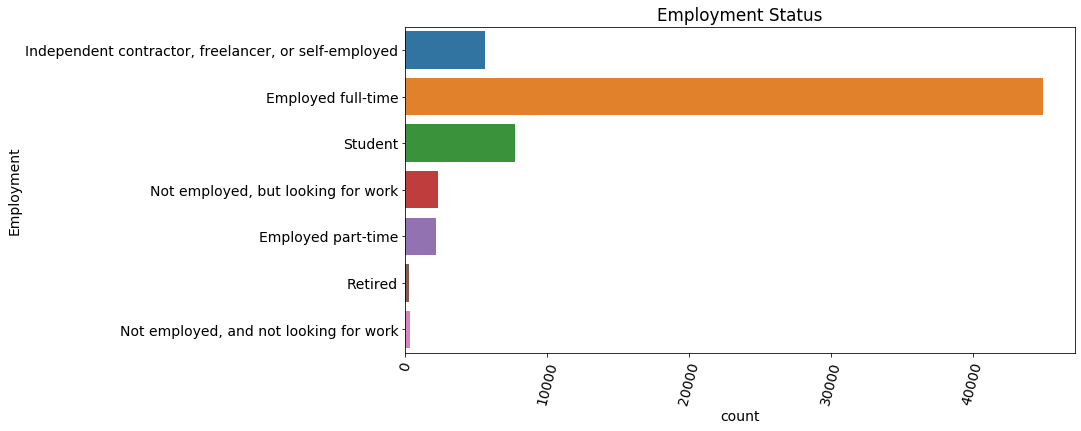

In [172]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12,6))
sns.countplot(y='Employment',data=df_developers)
plt.xticks(rotation=75)
plt.title('Employment Status');


It appears that close to 10% of respondents are employed part time or as freelancers.

In [191]:
x=df_developers['DevType'].dropna()
x

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
5          Designer;Developer, front-end;Developer, mobile
6        Developer, back-end;Developer, front-end;Devel...
7        Developer, back-end;Developer, desktop or ente...
                               ...                        
64448    Developer, back-end;Developer, desktop or ente...
64449                                    Developer, mobile
64451        Data scientist or machine learning specialist
64453    Data or business analyst;Developer, mobile;Sen...
64456                                  Senior executive/VP
Name: DevType, Length: 48983, dtype: object

In [193]:
data_skill_c = {}
for row in x:
    for skill in row.split(sep = ";"):
        if skill not in data_skill_c.keys():
            data_skill_c[skill] = 1
        else:
            data_skill_c[skill] = data_skill_c[skill]+1

In [195]:
data_skill_c

{'Developer, desktop or enterprise applications': 11687,
 'Developer, full-stack': 26915,
 'Developer, mobile': 9406,
 'Designer': 5262,
 'Developer, front-end': 18128,
 'Developer, back-end': 26996,
 'Developer, QA or test': 3893,
 'DevOps specialist': 5915,
 'Developer, game or graphics': 2751,
 'Database administrator': 5658,
 'Developer, embedded applications or devices': 4701,
 'Engineer, data': 3700,
 'Educator': 2895,
 'System administrator': 5185,
 'Engineering manager': 2699,
 'Product manager': 2471,
 'Data or business analyst': 3970,
 'Academic researcher': 3502,
 'Data scientist or machine learning specialist': 3939,
 'Scientist': 2060,
 'Senior executive/VP': 1292,
 'Engineer, site reliability': 1921,
 'Marketing or sales professional': 625}

In [224]:
skill_df=pd.DataFrame(data_skill_c.items())
skill_df.columns=['skills','count']
skill_df.head()

,skills,count
0,"Developer, desktop or enterprise applications",11687
1,"Developer, full-stack",26915
2,"Developer, mobile",9406
3,Designer,5262
4,"Developer, front-end",18128


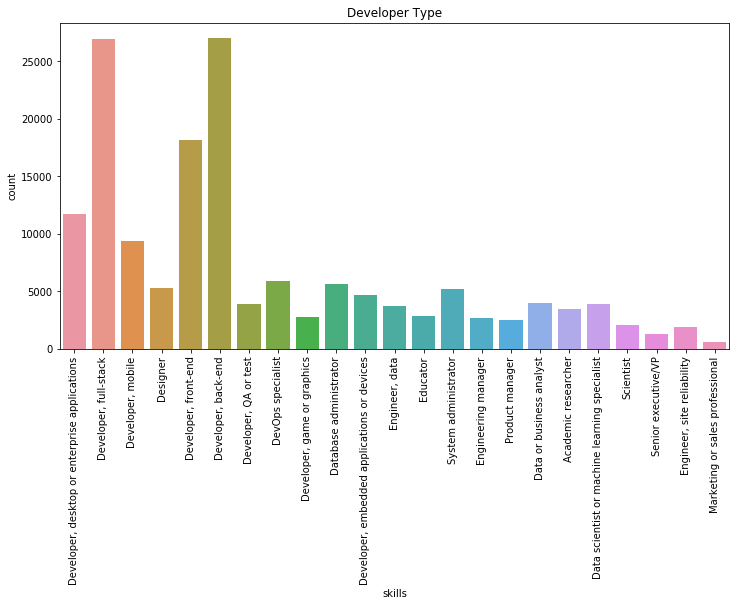

In [229]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.barplot(x='skills',y='count',data=skill_df)
plt.xticks(rotation=90)
plt.title('Developer Type');

We can see most of the respondents are backend developer or fullstack developer

In [231]:
df_developers['JobSat'].value_counts()

Very satisfied                        14502
Slightly satisfied                    13811
Slightly dissatisfied                  7070
Neither satisfied nor dissatisfied     5747
Very dissatisfied                      3705
Name: JobSat, dtype: int64

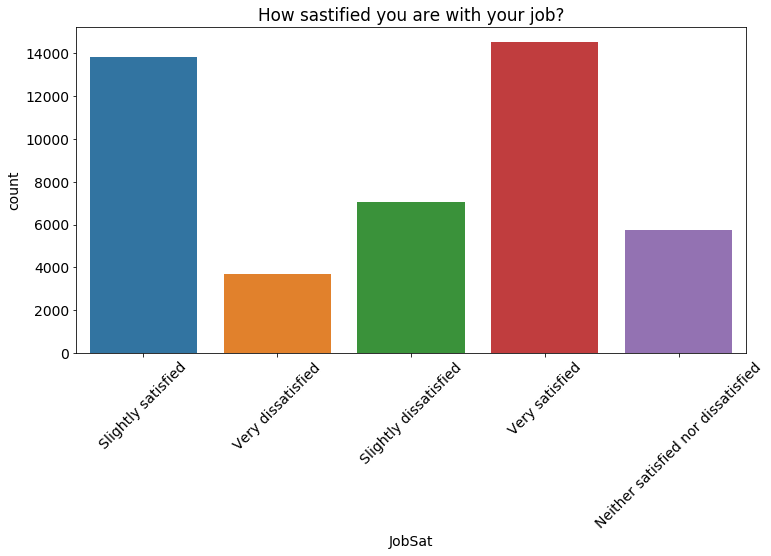

In [235]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12,6))
sns.countplot(df_developers['JobSat'])
plt.xticks(rotation=45)
plt.title('How sastified you are with your job?');

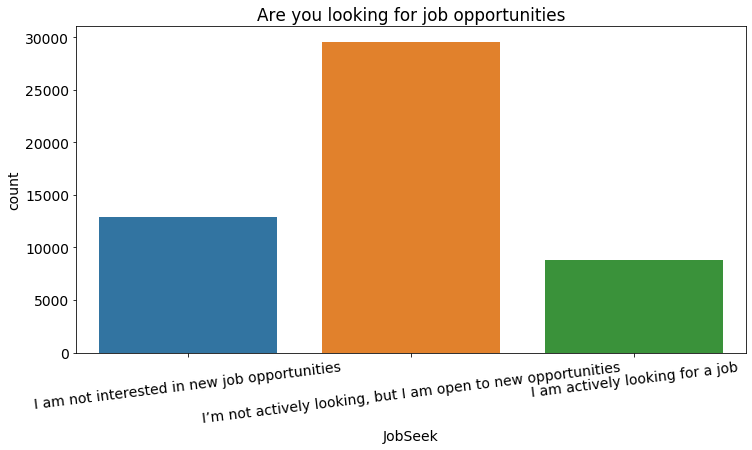

In [245]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12,6))
sns.countplot(df_developers['JobSeek'])
plt.xticks(rotation=7)
plt.title('Are you looking for job opportunities');

Most of the respondents are not actively looking for new job but are open to new opportunities.

PROGRAMMING EXPEREINCE

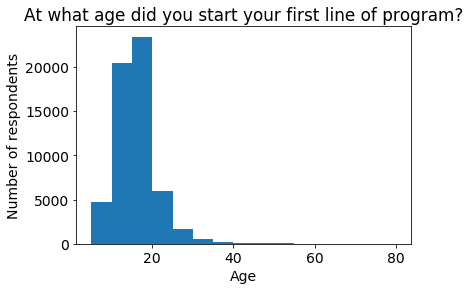

In [286]:
plt.hist(df_developers['Age1stCode'],bins=np.arange(5,85,5))
plt.title('At what age did you start your first line of program?')
plt.xlabel('Age')
plt.ylabel('Number of respondents');

Most of the respondents have started first between 10 to 20 years of age.

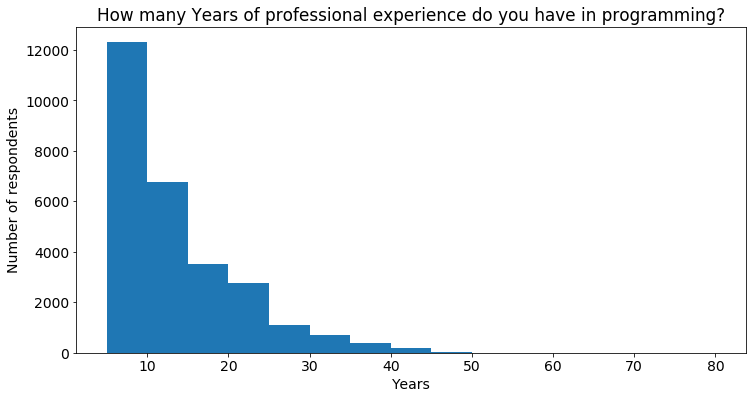

In [361]:
matplotlib.rcParams['font.size'] = 14
plt.figure(figsize=(12,6))
plt.hist(df_developers['YearsCodePro'],bins=np.arange(5,85,5))
plt.title('How many Years of professional experience do you have in programming?')
plt.xlabel('Years')
plt.ylabel('Number of respondents');


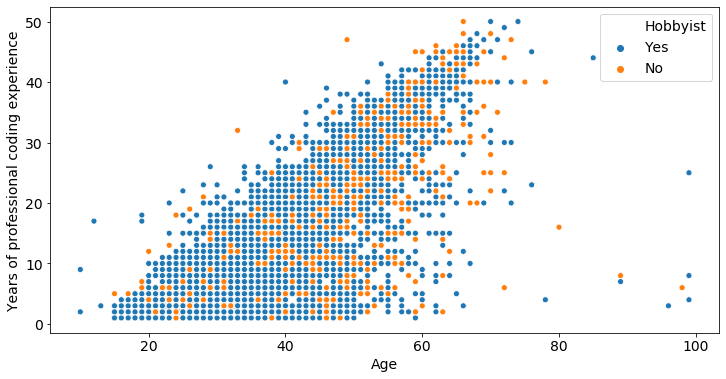

In [365]:
plt.figure(figsize=(12,6))
sns.scatterplot(df_developers['Age'],df_developers['YearsCodePro'],hue=df_developers['Hobbyist'])
plt.ylabel('Years of professional coding experience');

Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

In [299]:
df_developers['LanguageWorkedWith'].isnull().sum()
y=df_developers['LanguageWorkedWith'].dropna()

In [300]:
data_Language = {}
for i in y:
    for j in i.split(sep = ";"):
        if j not in data_Language.keys():
            data_Language[j] = 1
        else:
            data_Language[j] = data_Language[j]+1

In [366]:
data_Language_df=pd.DataFrame(data_Language.items(),columns=['Languages','Count'])


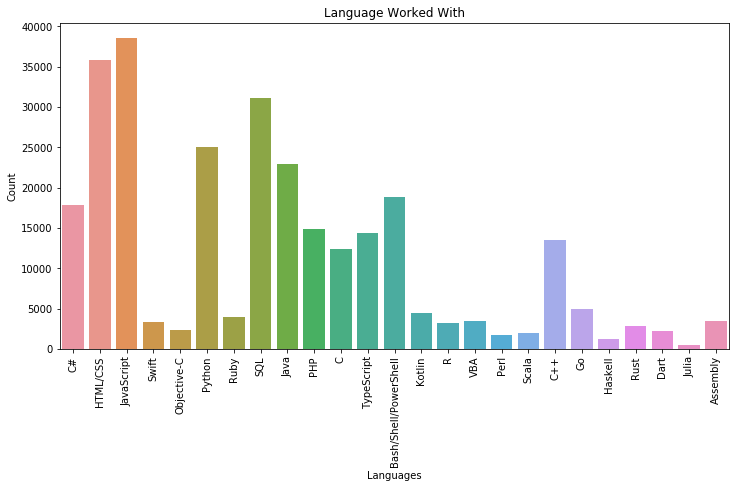

In [303]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.barplot(x='Languages',y='Count',data=data_Language_df)
plt.xticks(rotation=90)
plt.title('Language Worked With');

Most of the respondents have worked with Javascript followed by HTML/CSS. Also, many have worked with SQL also which is important for work  with database.

In [317]:
Language_desired_clean=df_developers['LanguageDesireNextYear'].dropna()


In [322]:
LanDesired={}
for i in Language_desired_clean:
    for j in i.split(sep=';'):
        if j not in LanDesired.keys():
            LanDesired[j]=1
        else:
            LanDesired[j]=LanDesired[j]+1

In [367]:
LanDesired_df=pd.DataFrame(LanDesired.items(),columns=['Languages','Counts'])


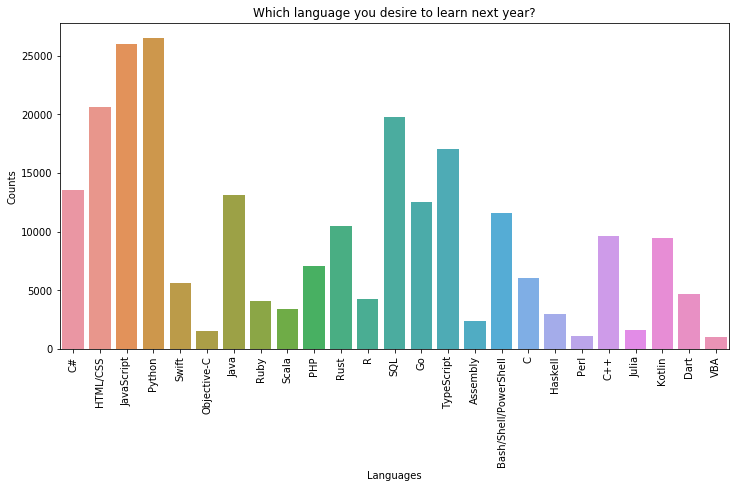

In [369]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.barplot(LanDesired_df['Languages'],LanDesired_df['Counts'])
plt.xticks(rotation=90)
plt.title('Which language you desire to learn next year?');

Most of the respondents desire to learn Python next year followed by Javascript.

In [389]:
lovedlanguage_df=pd.merge(data_Language_df,LanDesired_df,how='inner')
lovedlanguage_df.Counts=lovedlanguage_df.Count+lovedlanguage_df.Counts
lovedlanguage_df.pop('Count')
lovedlanguage_df.head()

,Languages,Counts
0,C#,31421
1,HTML/CSS,56480
2,JavaScript,64511
3,Swift,8951
4,Objective-C,3821


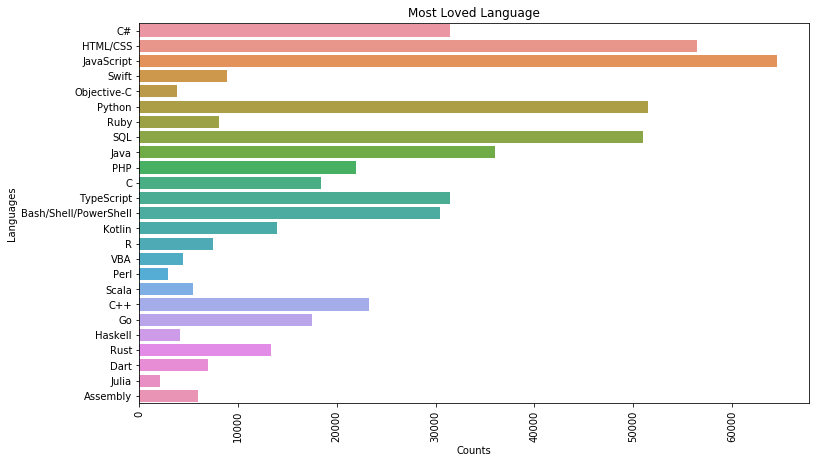

In [392]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,7))
sns.barplot(y=lovedlanguage_df['Languages'],x=lovedlanguage_df['Counts'])
plt.xticks(rotation=90)
plt.title('Most Loved Language');

The most loved language is no doubt JavaScript .Python and SQL is also loved by many of the respondents.

In [339]:
web_clean1=df_developers['WebframeWorkedWith'].dropna()

In [341]:
WebFrameWorked={}
for i in web_clean1:
    for j in i.split(sep=';'):
        if j not in WebFrameWorked.keys():
            WebFrameWorked[j]=1
        else:
            WebFrameWorked[j]=WebFrameWorked[j]+1

In [342]:
WebframeWorkedr_df=pd.DataFrame(WebFrameWorked.items(),columns=['FrameWork','Counts'])

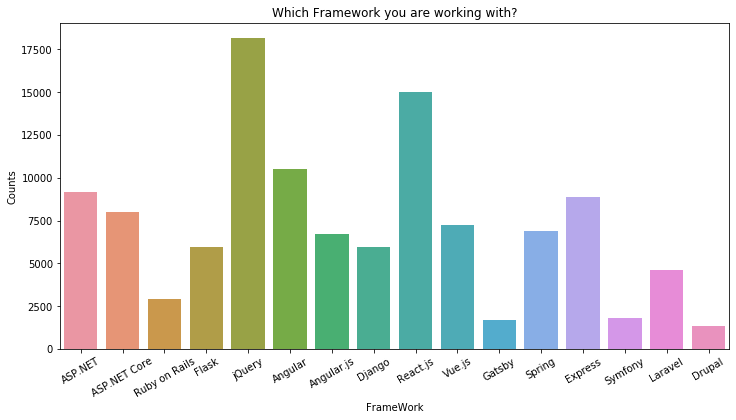

In [344]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.barplot(WebframeWorkedr_df['FrameWork'],WebframeWorkedr_df['Counts'])
plt.xticks(rotation=30)
plt.title('Which Framework you are working with?');

Most of the respondents are working with jQuery followed by React.js

In [333]:
Web_clean=df_developers['WebframeDesireNextYear'].dropna()

In [334]:
WebFrameDesired={}
for i in Web_clean:
    for j in i.split(sep=';'):
        if j not in WebFrameDesired.keys():
            WebFrameDesired[j]=1
        else:
            WebFrameDesired[j]=WebFrameDesired[j]+1

In [335]:
WebframeDesireNextYear_df=pd.DataFrame(WebFrameDesired.items(),columns=['FrameWork','Counts'])

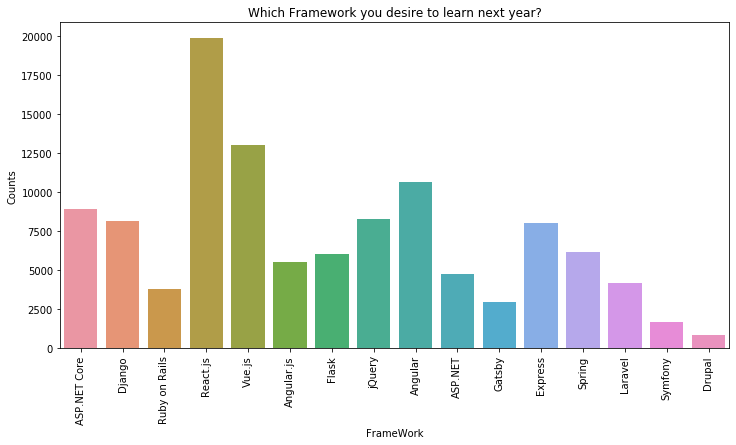

In [393]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.barplot(WebframeDesireNextYear_df['FrameWork'],WebframeDesireNextYear_df['Counts'])
plt.xticks(rotation=90)
plt.title('Which Framework you desire to learn next year?');

Maximum number of respondents want to learn React.js next year.

In [348]:
NEWStuck_clean=df_developers['NEWStuck'].dropna()

In [349]:
NewStuck={}
for i in NEWStuck_clean:
    for j in i.split(sep=';'):
        if j not in NewStuck.keys():
            NewStuck[j]=1
        else:
            NewStuck[j]=NewStuck[j]+1

In [350]:
NEWStuck_clean_df=pd.DataFrame(NewStuck.items(),columns=['Solution','Counts'])

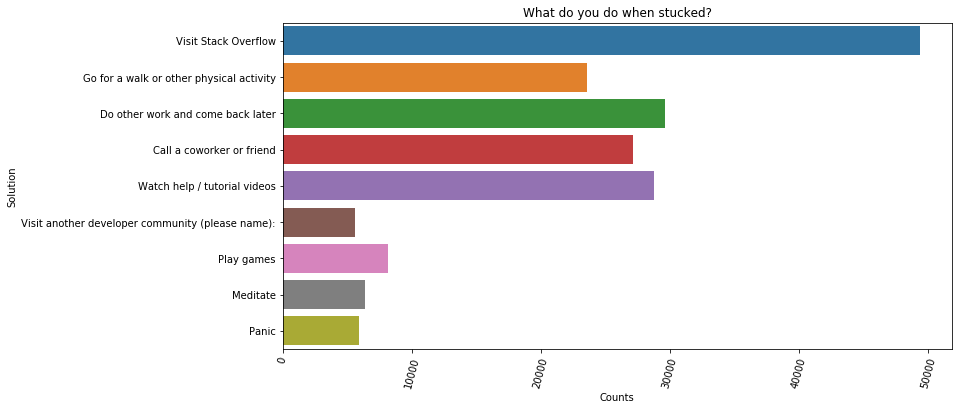

In [356]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(12,6))
sns.barplot(y=NEWStuck_clean_df['Solution'],x=NEWStuck_clean_df['Counts'])
plt.xticks(rotation=75)
plt.title('What do you do when stucked?');

Obviously, most of the respondents visits Stack Overflow whenever they are stucked while coding.